In [1]:
import jupyter_black
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set_theme(style="white")

# Load data

In [2]:
df = pd.read_excel('Contact Center Data.xlsb', engine='pyxlsb')

In [25]:
df.head()

,Customer_Id,Source,Customer_Profile,Age_Group,Gender,Purpose,Product_Type,Comments,Outcome
0,1,SMS,Salaried,22 - 25,Male,Movies,Tablet,Call drop.,Call Disconnected
1,2,Websites,Salaried,22 - 25,Male,Speed Response,Notebook,Call drop,Call Disconnected
2,3,Websites,Salaried,26 - 30,Male,Speed Response,Notebook,"While assisting with the info, Customer discon...",Call Disconnected
3,4,Websites,Salaried,26 - 30,Male,Speed Response,Notebook,Customer had already ordered for G500 and enqu...,Product Specs Enquiry
4,5,Websites,Salaried,22 - 25,Male,Stylish,Tablet,Call disconnected,Call Disconnected


# Problem statement
Analyze the contact center data (attached herewith) to 
1. understand the causes of customer calls
1. give recommendations on reducing call volumes to increase customer sales. 

You should:
1. Conduct EDAs to analyze the data (including mining/analysis of text fields and inputs) and better understand call reasons and outcomes
1. Summarize your findings using appropriate visualizations (feel free to use any tools for this)

For this assignment, please provide crisp, data-backed and to-the-point recommendations for improvement, based on your analysis.

---

# Approach

Brief
- In order to analyse "What are probable causes of volume of calls".
- we need to analyse variables in Set A along with variables in Set B to get a better understanding of problem.


Set A:
- "Source" : Maximum calls come from "Websites", "Newspapers" and "Friends" in decreasing order
- "Customer_Profile" : Maximum calls come from "Salaried" and "Student" profiles
- "Age_Group" : Maximum calls come from people in the age groups 18-30

Set B:
- "Outcome" : What was the outcome of the call?
- "Purpose" : What was the purpose of the call?
- "Product_Type" : What product was the call for?


# Source

From monovariate analysis we know that - "Websites" and "Newspaper" are major sources of calls
```
Source
Websites        79.79
Newspaper       12.87
```

Hence let us try to analyse these 2 top categories (~91% variance of the data) for bivariate analysis

## "Source" vs "Outcome"

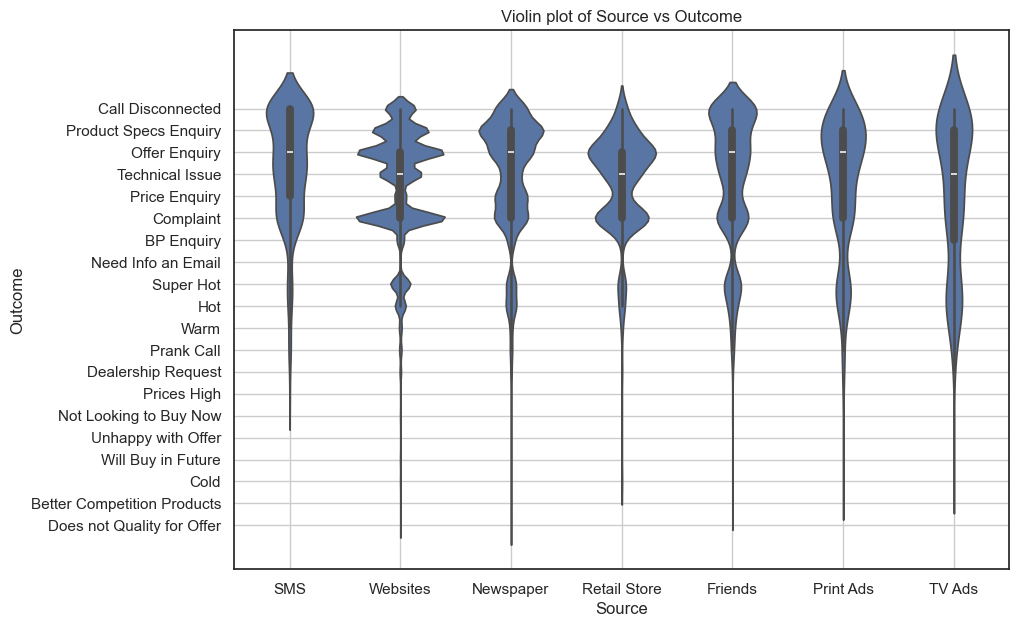

In [8]:
df_temp = df[['Source', 'Outcome']].copy(deep=True)
plt.figure(figsize=[10, 7])
plt.title("Violin plot of Source vs Outcome")
sns.violinplot(x="Source", y="Outcome", data=df_temp)
plt.grid()
plt.show()

From the above plot we can see that

Website:
- Majority (based on mass of distribution) of calls from Website have following Outcomes `["Offer Enquiry", "Technical Issue", "Price Enquiry", "Complaint"]`
- **Which tells us that users are enquiring about "Offer"/ "Price" about some product is either NOT mentioned on the website or is difficult to find on the website**
- Regarding `["Technical Issue", "Complaint"]` we need few more data points before making a comment

Newspaper:
- Majority (based on mass of distribution) of calls from Newspaper have following Outcomes `["Product Specs Enquiry", "Offer Enquiry", "Technical Issue", "Price Enquiry", "Complaint"]`
- **Which tells us that users are enquiring about "Product Specs"/ "Price" about some product which might NOT be mentioned on the ad of newspaper**
- Regarding `["Technical Issue", "Complaint"]` we need few more data points before making a comment

## "Source" vs "Purpose"

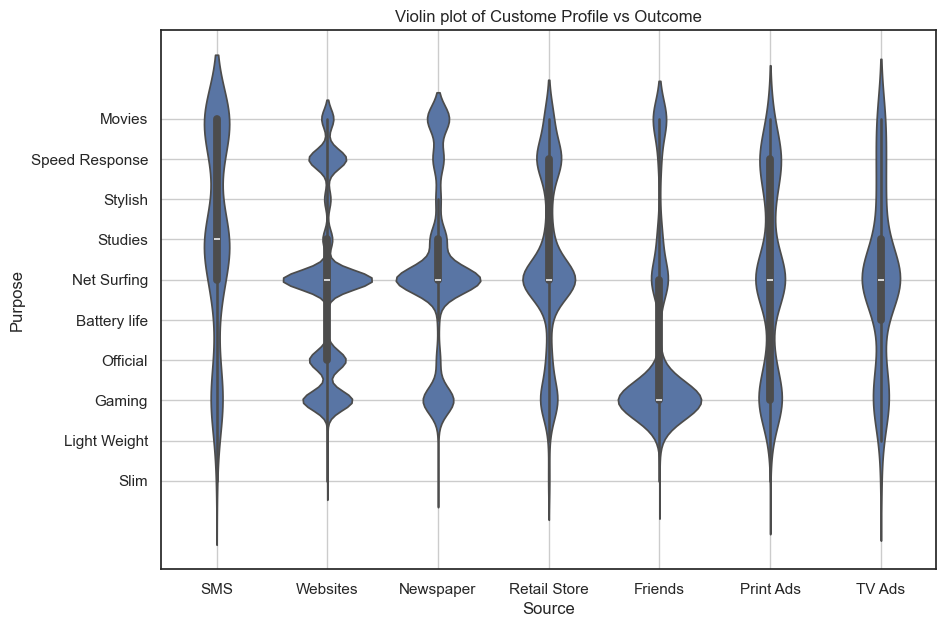

In [9]:
df_temp = df[['Source', 'Purpose']].copy(deep=True)
plt.figure(figsize=[10, 7])
plt.title("Violin plot of Custome Profile vs Outcome")
sns.violinplot(x="Source", y="Purpose", data=df_temp )
plt.grid()
plt.show()

From the above plot we can see that:

Website:
- Customers who are calling from "Websites" are using/ will use their device/s for majorly "Net Surfing", "Gaming", "Official", " Speed Response" purpose

Newspaper:
- Customers  who are calling from "Newspaper" are using/ will use their device majorly for "Net Surfing", "Gaming"

From this we can infer that:
- "Net Surfing"/ "Gaming"/ "Official" might contribute to the problems faced by customers

## "Source" vs "Product_Type"

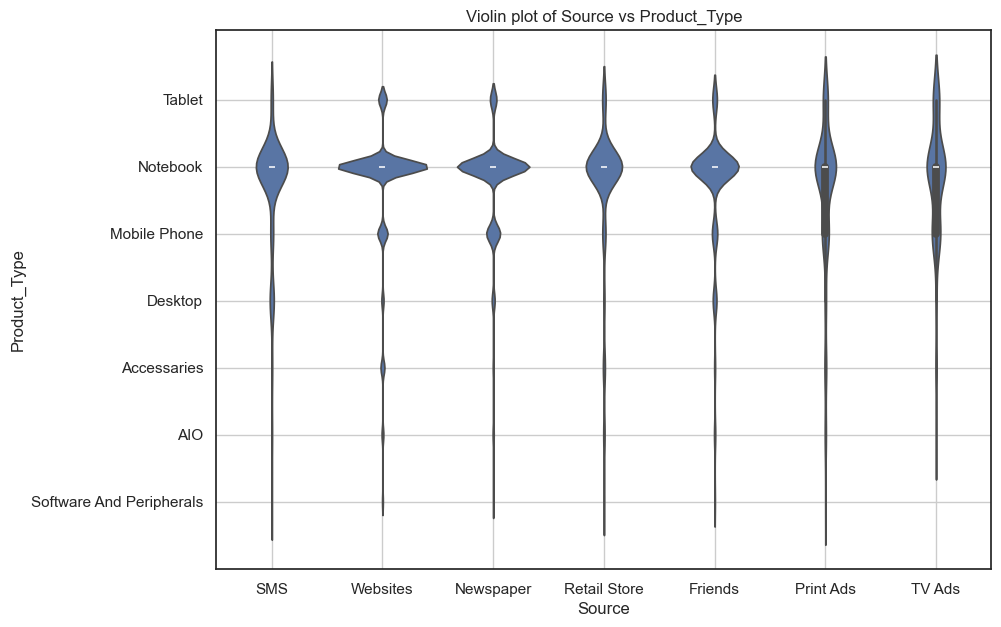

In [10]:
df_temp = df[['Source', 'Product_Type']].copy(deep=True)
plt.figure(figsize=[10, 7])
plt.title("Violin plot of Source vs Product_Type")
sns.violinplot(x="Source", y="Product_Type", data=df_temp )
plt.grid()
plt.show()

From the above plot we can clearly see that:

- "Notebook" is the root cause of problem
- **There is 'some' problem associated with the product called "Notebook" which should be fixed to reduce volume of calls**
- What exactly this problem is requires further analysis

# Customer Profile

- From monovariate analysis we know that - "Salaried", "Student" and "Self Employed" are major sources of calls

- Source
```
 Salaried        60.91%
 Student         15.61%
 Self Employed   11.27%
 ```
- Hence let us try to analyse these 3 top categories (~88% variance of the data) for bivariate analysis

- ~12% of the sources are unknown("--Select--")


# "Customer Profile" vs "Outcome"

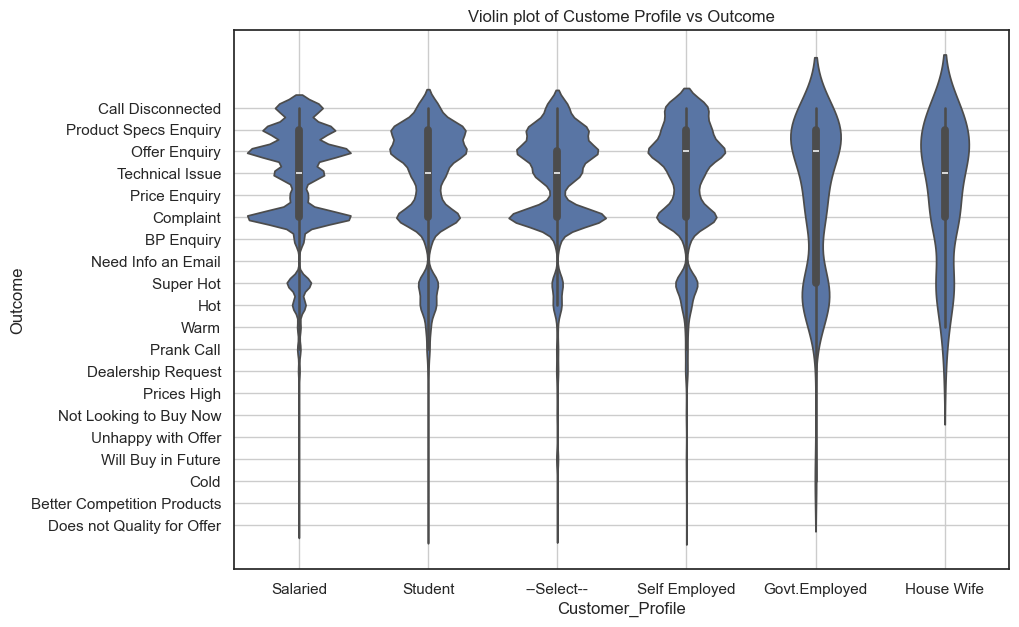

In [11]:
df_temp2 = df[['Customer_Profile', 'Outcome']].copy(deep=True)
plt.figure(figsize=[10, 7])
plt.title("Violin plot of Custome Profile vs Outcome")
sns.violinplot(x="Customer_Profile", y="Outcome", data=df_temp2 )
plt.grid()
plt.show()

- "Salaried" people mostly call about "Complaints", "Offer Enquiry", "Product Specs Enquiry", "Call Disconnected" and "Technical Issue"
- "Student" and "Self Employed" mostly call regarding the same things as "Salaried" people.

# Customer Profile vs Purpose

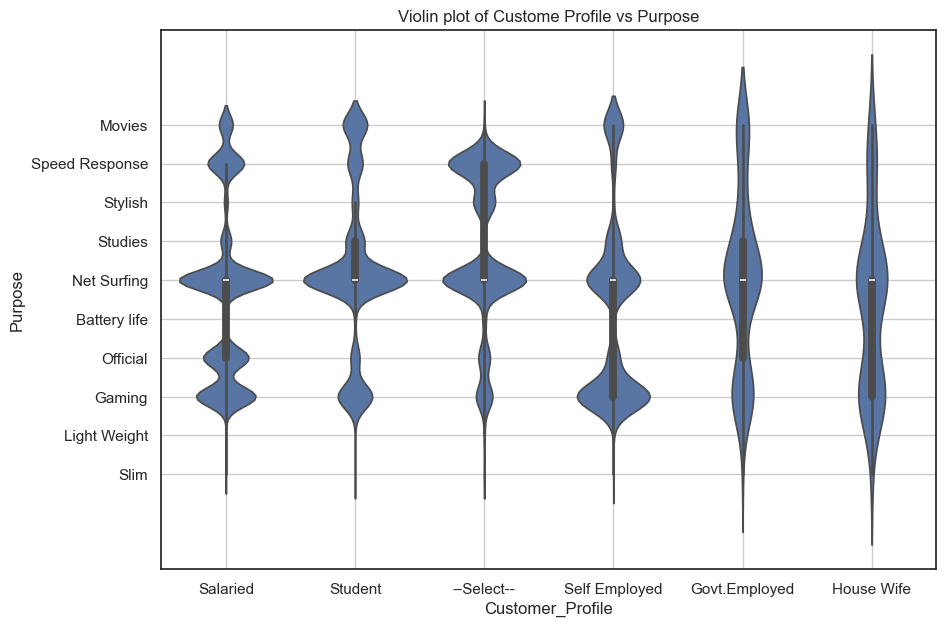

In [12]:
df_temp = df[['Customer_Profile', 'Purpose']].copy(deep=True)
plt.figure(figsize=[10, 7])
plt.title("Violin plot of Custome Profile vs Purpose")
sns.violinplot(x="Customer_Profile", y="Purpose", data=df_temp )
plt.grid()
plt.show()


    - "Customer profile" is calling the most for Net Surfing related information or issues.
    - "Salaried" call about "Net Surfing", "Gaming", "Official" and "Speed Response"
    - "Student" call about "Net Surfing"and "Gaming"
    - "Self Employed" mostly call about "Gaming" followed by "Net Surfing"
    
Since, "Net Surfing" is the biggest concern, we can further study what are the factors that contribute to net surfing.
Different customer segments can have different advertisements considering different packages,
say Self Employed and Student should be told about Net Surfing and Gaming.



# Customer Profile vs Product Type

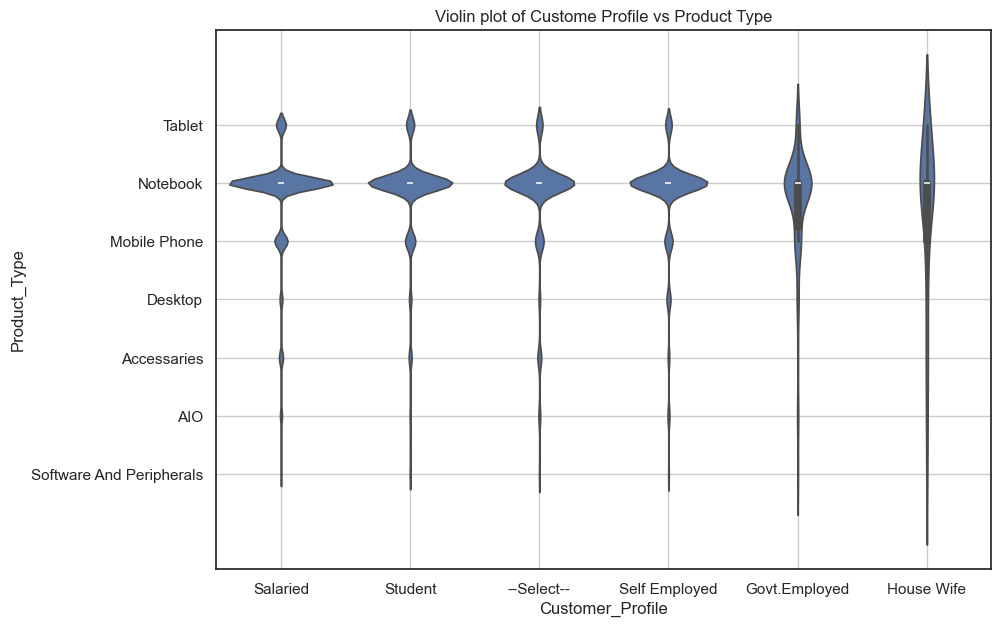

In [15]:
df_temp = df[['Customer_Profile', 'Product_Type']].copy(deep=True)
plt.figure(figsize=[10, 7])
plt.title("Violin plot of Custome Profile vs Product Type")
sns.violinplot(x="Customer_Profile", y="Product_Type", data=df_temp )
plt.grid()
plt.show()

From the above plot we can clearly see that:

"Notebook" is the root cause of problem
There is 'some' problem associated with the product called "Notebook" which should be fixed to reduce volume of calls
What exactly this problem is requires further analysis

# Age_Group

# "Age_Group" vs "Outcome"

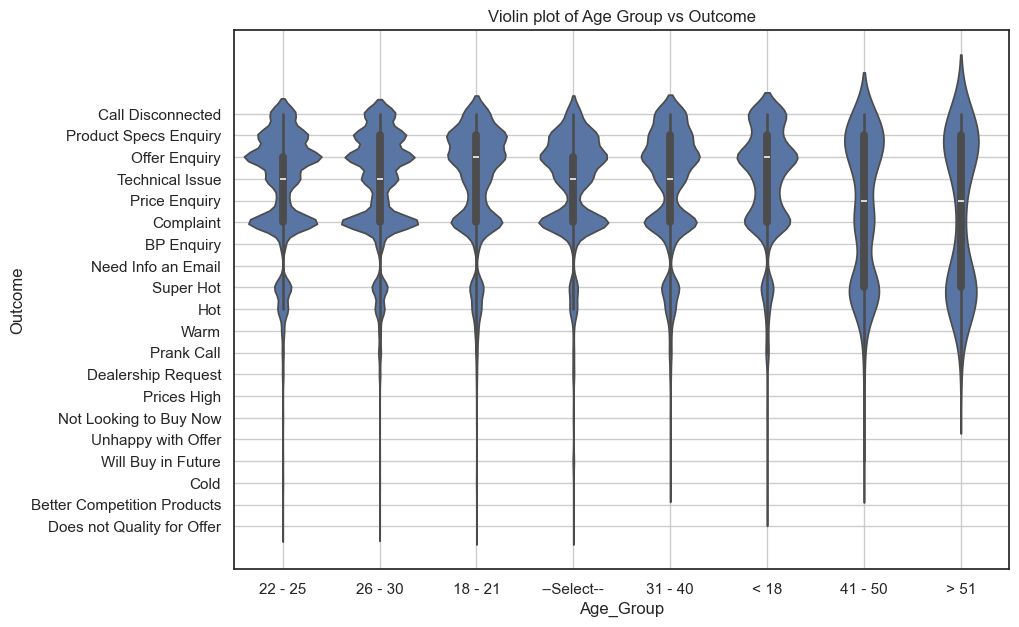

In [17]:
df_temp = df[['Age_Group', 'Outcome']].copy(deep=True)
plt.figure(figsize=[10, 7])
plt.title("Violin plot of Age Group vs Outcome")
sns.violinplot(x="Age_Group", y="Outcome", data=df_temp )
plt.grid()
plt.show()

- Across all the age groups "Offer Enquiry", "Complaint", "Product Specs Enquiry", " Call Disconnected", "Complaints" are the outcomes of the calls
- Age 31-51 have called regarding "Super hot" or "hot" outcomes
- "Technical Issue" is not the main concern for the age 18-21
- "Price Enquiry" calls are mostly coming from "Below 18" age segment

# "Age_Group" vs "Purpose"

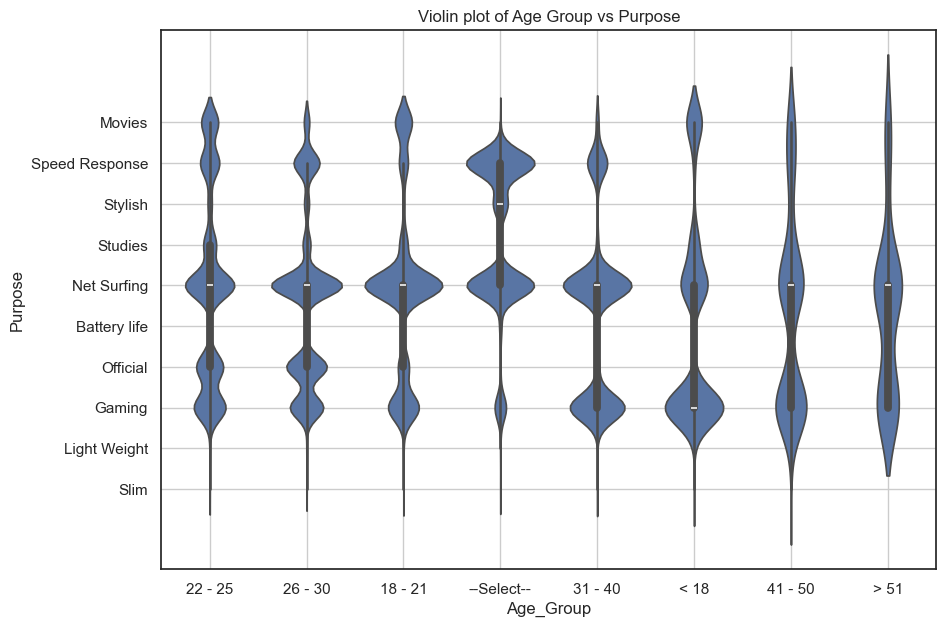

In [20]:
df_temp = df[['Age_Group', 'Purpose']].copy(deep=True)
plt.figure(figsize=[10, 7])
plt.title("Violin plot of Age Group vs Purpose")
sns.violinplot(x="Age_Group", y="Purpose", data=df_temp )
plt.grid()
plt.show()

- "Net Surfing" and "Gaming" accross all age groups
- "__Select__" has no specific age group selected, but it is seen that there are many calls for "Speed Response" and it is a bit of a concern across all the ages
- "Gaming" is accross all the groups but below 18 and 31-40 are calling more for the same.
- Age group 22-25 and 26-30 are calling for "Official Purposes"

# "Age_Group" vs "Product_Type"

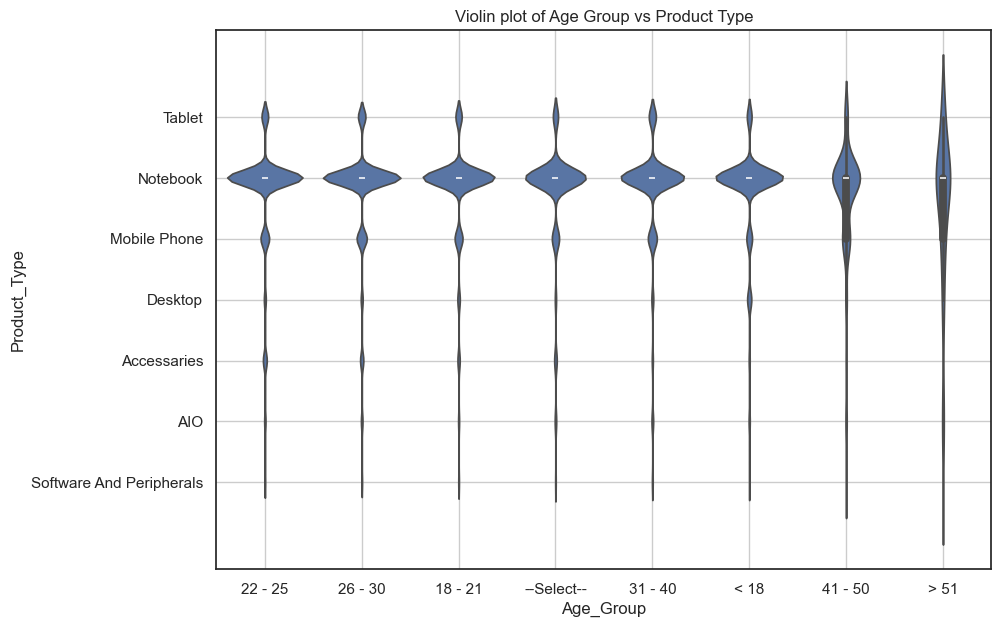

In [22]:
df_temp = df[['Age_Group', 'Product_Type']].copy(deep=True)
plt.figure(figsize=[10, 7])
plt.title("Violin plot of Age Group vs Product Type")
sns.violinplot(x="Age_Group", y="Product_Type", data=df_temp )
plt.grid()
plt.show()

- Across every age "Notebook" is the reason customers are calling
- After "Notebook", "Mobile Phone" and "Tablet" are the reasons customers are calling

1. Data Overview:

   Customer Profiles:
- Majority of calls are from "Salaried" and "Student" profiles.

   Age Distribution:
- Most calls come from individuals in the age groups 18-30.

   Source of Calls:
- Maximum calls are from "Websites," "Newspapers," and "Friends."

2. Outcome Analysis:

 Common Outcomes:
- Common call outcomes include "Complaint," "Offer Enquiry," and "Product Specs Enquiry."

 Call Disconnections:
- A significant number of calls end in "Call Disconnected."
3. Purpose and Product Type Analysis:

 Purpose of Calls:
- "Net Surfing," "Gaming," and "Official" are common call purposes.

 Product Types:
- "Notebook" is the most common product type mentioned in calls.


# Recommendations

Recommendations:
- Improve Website Information:

Enhance information on the website related to "Offer," "Technical Details," and "Price" to reduce related inquiries and complaints.
- Address Call Disconnections:

Investigate and address the root causes of call disconnections to improve customer satisfaction.
- Customer Segmentation:

Tailor advertisements and product information for different customer profiles, especially focusing on "Net Surfing" and "Gaming."

- Product Quality Assurance:

Investigate and address issues related to the "Notebook" product, as it is frequently mentioned in calls.
- Enhance Customer Support:

Improve support for common call purposes like "Complaint," "Offer Enquiry," and "Product Specs Enquiry."
- Text Analytics for Feedback:

Leverage text analytics to gain deeper insights from comments and identify specific issues or areas for improvement.
- Monitor Age-Specific Concerns:

Be attentive to age-specific concerns, such as "Technical Issues" for 31-51 age group and "Price Enquiry" for below 18.